# Time Series Data Denoising using Autoencoders


This project centers on employing a Long Short-Term Memory (LSTM) model within an autoencoder framework for denoising time series data. The LSTM's effectiveness in capturing temporal relationships and mitigating gradient vanishing issues is harnessed, particularly valuable for sequences with long-term dependencies, such as time series data. The model's training, spanning 10 epochs, resulted in a loss of 0.00170 and a validation loss of 0.000824. Remarkably, the Mean Squared Error (MSE) reached 0.0029, indicating the autoencoder's success in effectively eliminating noise while maintaining data fidelity. The training process showcases rapid and substantial loss reduction, further substantiating the model's efficacy. Images depicting both original and denoised data affirm the autoencoder's noise reduction capability. In conclusion, the LSTM autoencoder proved proficient in denoising time series data, capitalizing on LSTM's intrinsic strengths in temporal modeling and gradient handling.

In [1]:
# Libraries loading
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Dense, LSTM, RepeatVector
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Loading datasets
X_train = pd.read_csv('D:\\Python\\Datafolder\\time-series_data\\X_train.csv', header = None)
X_test = pd.read_csv('D:\\Python\\Datafolder\\time-series_data\\X_test.csv', header = None)
X_val = pd.read_csv('D:\\Python\\Datafolder\\time-series_data\\X_val.csv', header = None)
Y_train = pd.read_csv('D:\\Python\\Datafolder\\time-series_data\\Y_train.csv', header = None)
Y_test = pd.read_csv('D:\\Python\\Datafolder\\time-series_data\\Y_test.csv', header = None)
Y_val = pd.read_csv('D:\\Python\\Datafolder\\time-series_data\\Y_val.csv', header = None)

In [3]:
# Selecting Testing data
X_test1 = X_test[1521:1541]
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 1521 to 1540
Columns: 331 entries, 0 to 330
dtypes: float64(331)
memory usage: 51.8 KB


In [4]:
# Selecting Testing data
Y_test1 = Y_test[1521:1541]
Y_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 1521 to 1540
Columns: 331 entries, 0 to 330
dtypes: float64(331)
memory usage: 51.8 KB


In [5]:
# Reshaping the data
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
Y_train = Y_train.values.reshape((Y_train.shape[0], 1, Y_train.shape[1]))
X_test1 = X_test1.values.reshape((X_test1.shape[0], 1, X_test1.shape[1]))
Y_test1 = Y_test1.values.reshape((Y_test1.shape[0], 1, Y_test1.shape[1]))
X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
Y_val = Y_val.values.reshape((Y_val.shape[0], 1, Y_val.shape[1]))

### The autoencoder model architecture

In [6]:
# Define the autoencoder model
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(64, activation='relu', return_sequences=True)(inputs)
x = LSTM(32, activation='relu', return_sequences=False)(x)
x = RepeatVector(X_train.shape[1])(x)
x = LSTM(32, activation='relu', return_sequences=True)(x)
x = LSTM(64, activation='relu', return_sequences=True)(x)
outputs = Dense(X_train.shape[2])(x)
model = Model(inputs=inputs, outputs=outputs)


### Model summary

In [7]:
# model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 331)]          0         
                                                                 
 lstm (LSTM)                 (None, 1, 64)             101376    
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 repeat_vector (RepeatVector  (None, 1, 32)            0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 32)             8320      
                                                                 
 lstm_3 (LSTM)               (None, 1, 64)             24832     
                                                             

In [8]:
# Compiling the model
model.compile(optimizer='adam', loss='mse')

### Model training

In [9]:
# Training the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/10
147/147 [==============================] - 11s 21ms/step - loss: 0.1122 - val_loss: 0.0020
Epoch 2/10
147/147 [==============================] - 3s 23ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 3/10
147/147 [==============================] - 3s 20ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 4/10
147/147 [==============================] - 3s 21ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 5/10
147/147 [==============================] - 3s 18ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 6/10
147/147 [==============================] - 2s 11ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 7/10
147/147 [==============================] - 1s 9ms/step - loss: 0.0018 - val_loss: 8.4697e-04
Epoch 8/10
147/147 [==============================] - 1s 9ms/step - loss: 0.0018 - val_loss: 8.7396e-04
Epoch 9/10
147/147 [==============================] - 2s 12ms/step - loss: 0.0018 - val_loss: 8.9470e-04
Epoch 10/10
147/147 [==============================] - 2s 12ms/step - loss: 0.00

In [10]:
#Model evaluation
model.evaluate(X_test1, Y_test1, verbose=2)

1/1 - 0s - loss: 4.3545e-04 - 32ms/epoch - 32ms/step


0.0004354507545940578

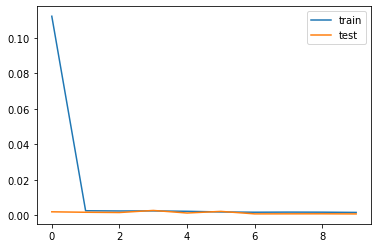

In [11]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [12]:
# Using the trained autoencoder to denoise new time-series data
denoised_X_test = model.predict(X_test1)

In [13]:
# Flattening the 3D array into a 2D array
X_test_flat = np.reshape(X_test1, (X_test1.shape[0], -1))
denoised_X_test_flat = np.reshape(denoised_X_test, (denoised_X_test.shape[0], -1))

### The mean squared error for the model

In [14]:
# Calculating MSE between denoised and original data
mse = mean_squared_error(X_test_flat, denoised_X_test_flat)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.0028935522475247574


### A bar plot showing the original data

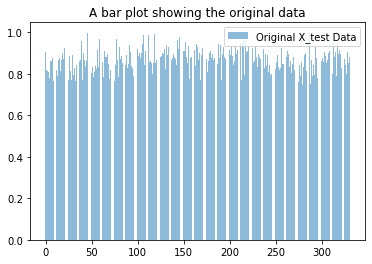

In [19]:
# indexing for random sample
sample_idx = 10
# Getting the originaltime series
original_ts = X_test1[sample_idx, 0, :]
# Creating a bar plot
plt.bar(range(len(original_ts)), original_ts, alpha=0.5, label='Original X_test Data')
plt.legend()
plt.title('A bar plot showing the original data')
plt.show()


### A bar plot showing denoised data

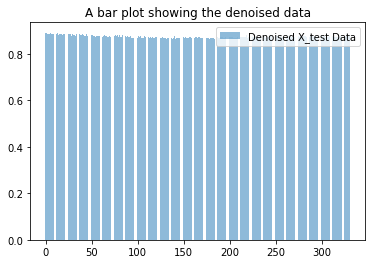

In [20]:
# indexing for random sample
sample_idx = 10
# Getting the denoised time series
denoised_ts = denoised_X_test[sample_idx, :].flatten()  # reshaping to 1D array
# Creating a bar plot
plt.bar(range(len(denoised_ts)), denoised_ts, alpha=0.5, label='Denoised X_test Data')
plt.legend()
plt.title('A bar plot showing the denoised data')
plt.show()


### A Scatter plot showing the original and denoised data

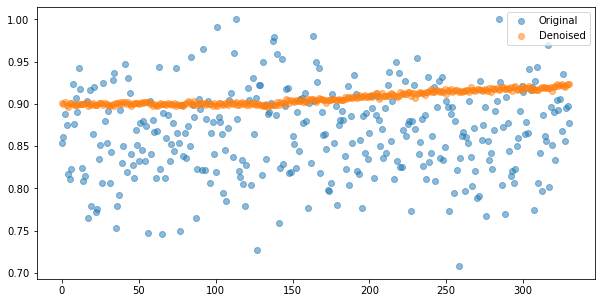

In [56]:
# Indexing for random sample
sample_idx = 10

# Getting the original and denoised time series
original_ts = X_test1[sample_idx, 0, :]
denoised_ts = denoised_X_test[sample_idx, :].flatten() 

# Creating a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(range(len(original_ts)), original_ts, alpha=0.5, label='Original')
plt.scatter(range(len(denoised_ts)), denoised_ts, alpha=0.5, label='Denoised')
plt.legend()
plt.show()


## The End